ADELINO, Joanne Mae B. / 2015-00014

In [17]:
import numpy as np 
from matplotlib import style
import matplotlib.pyplot as plt 
import numpy.linalg as lin 
import scipy.io as io 
from mpl_toolkits import mplot3d

In [18]:
style.use("default")

In [19]:
V1 = [0.085832, 0.17365, 0.98106]
V2 = [0.085832, -0.17365, 0.98106]
V3 = [0.17365, 0, 0.98481]
V4 = [0.16318, -0.34202, 0.92542]

In [20]:
V_mat = []
V_mat.append(V1)
V_mat.append(V2)
V_mat.append(V3)
V_mat.append(V4)

In [21]:
V = np.array(V_mat, float)

In [22]:
Vt = np.transpose(V)

In [23]:
photos = io.loadmat('Photos.mat')

In [24]:
I1 = photos['I1']
I2 = photos['I2']
I3 = photos['I3']
I4 = photos['I4']

In [25]:
I = np.zeros((128, 128,4), float)
I[:,:,0] = I1 
I[:,:,1] = I2 
I[:,:,2] = I3 
I[:,:,3] = I4 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


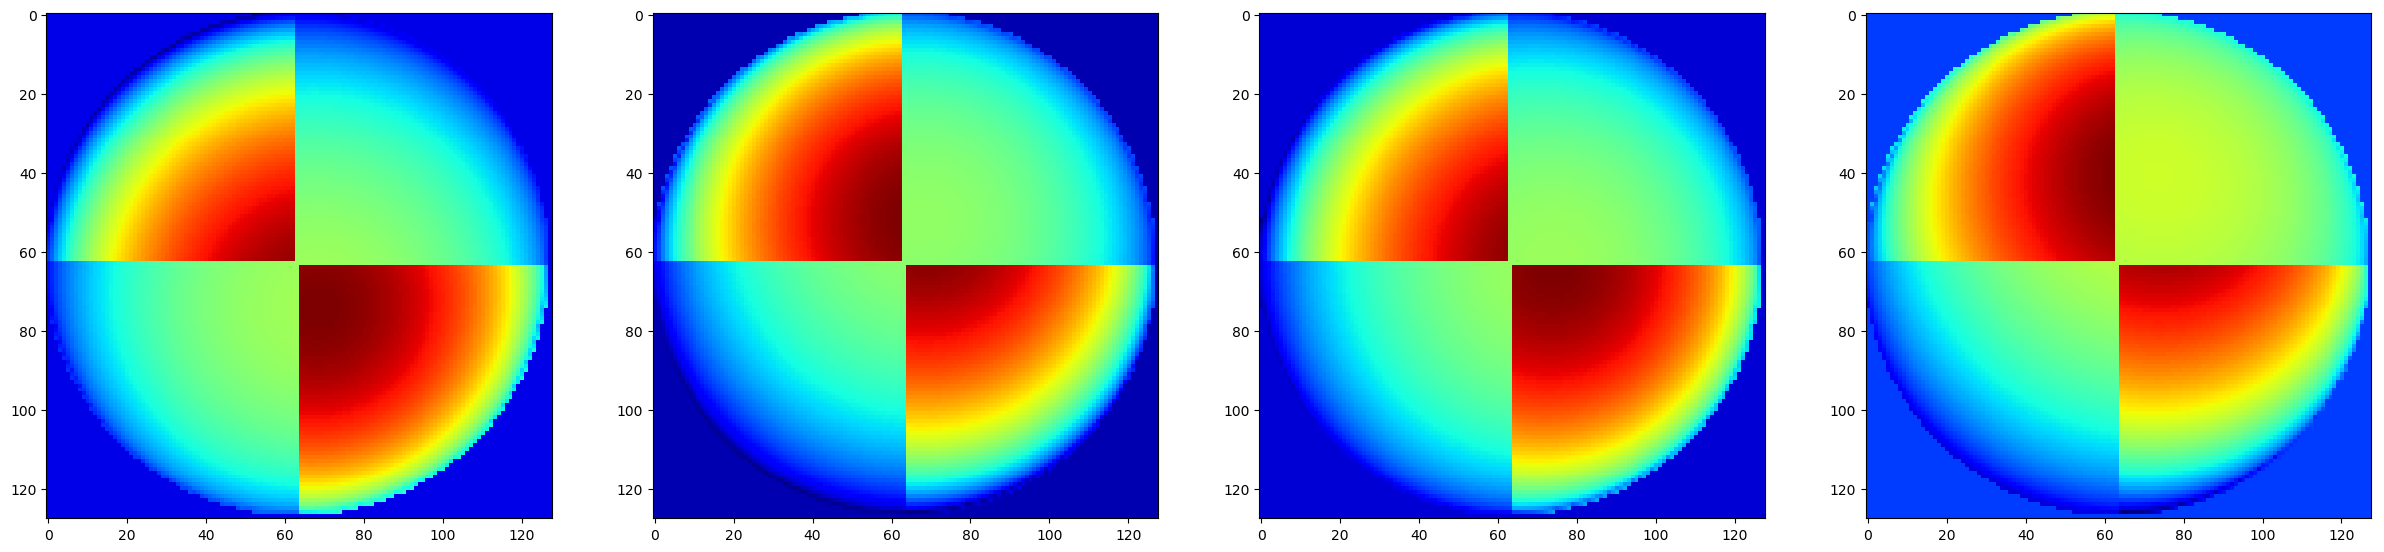

In [26]:
fig, ax = plt.subplots(ncols = 4, figsize = (30,15))
ax[0].imshow(I1, cmap = 'jet')
ax[0].grid('off')
ax[1].imshow(I2, cmap = 'jet')
ax[1].grid('off')
ax[2].imshow(I3, cmap = 'jet')
ax[2].grid('off')
ax[3].imshow(I4, cmap = 'jet')
ax[3].grid('off')

In [27]:
r,c = I2.shape
g_m = np.zeros((r,c,3), float)
n_m = np.zeros((r,c,3), float)

In [28]:
for i in range(r):
    for j in range(c):
        I = [I1[i,j], I2[i,j], I3[i,j], I4[i,j]]
        g = np.matmul(np.matmul(lin.inv(np.matmul(V.T,V)), V.T), I) 
        g_m[i,j,:] = g
        
        g_mag = np.sqrt(np.dot(g,g))
        
        if g_mag == 0.:
            n_m[i,j,:] = 0 
        else:
            n_m[i,j,:] = g /g_mag 

In [29]:
dfdx = np.nan_to_num(-n_m[:,:,0]/n_m[:,:,2])
dfdy = np.nan_to_num(-n_m[:,:,1]/n_m[:,:,2])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [30]:
x = np.arange(0, 128, 1)
y = np.arange(0, 128, 1)
X, Y = np.meshgrid(x, y)

In [31]:
N = 128
wx, wy = np.meshgrid(np.fft.fftfreq(N)*2*np.pi, np.fft.fftfreq(N)*2*np.pi, indexing = 'xy')
xx, yy = np.meshgrid(np.arange(N), np.arange(N))
num = -1j*wx*np.fft.fft2(dfdx)-1j*wy*np.fft.fft2(dfdy)
den = wx**2 + wy**2 + np.finfo(float).eps
res = np.fft.ifft2(num/den)
res -= np.mean(res.real)

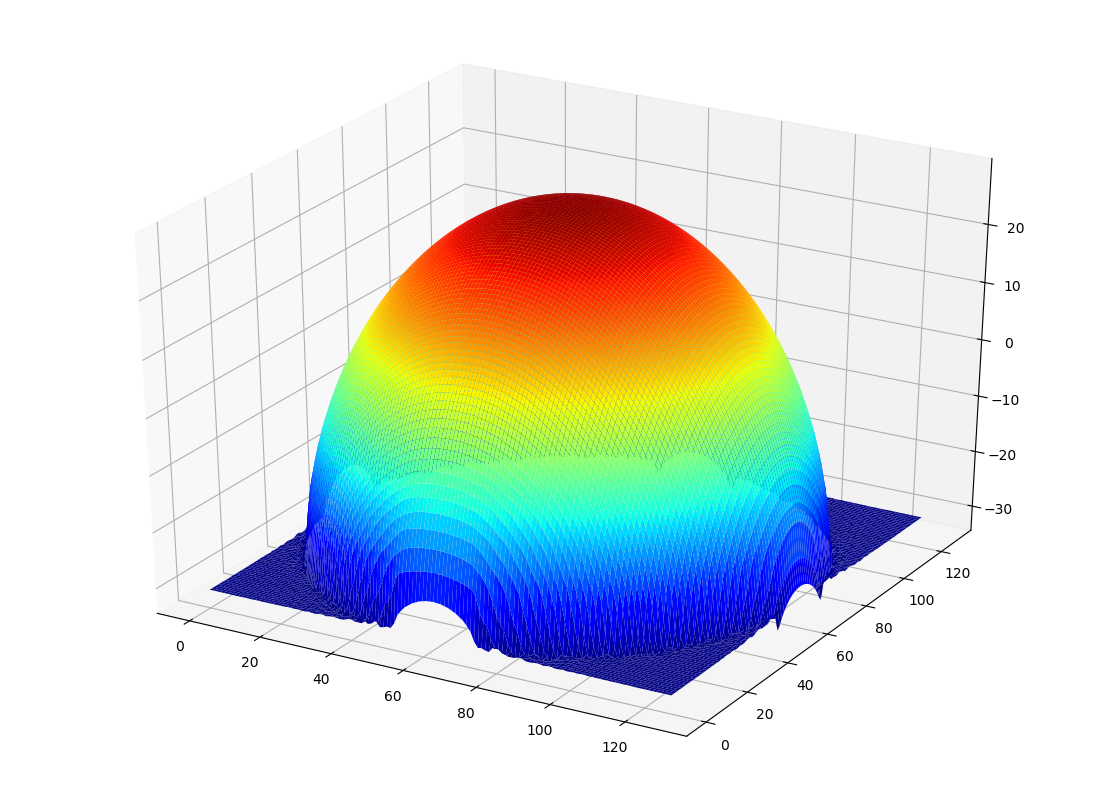

In [33]:
plt.figure(figsize = (14, 10), dpi = 100, facecolor = 'w')
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, res.real, rstride=1, cstride=1,cmap='jet', edgecolor='none') 
plt.show()